# Hw4

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

stu_adm = pd.read_csv('ds/student_admission106.csv', encoding="utf-8", dtype=str)
uname = pd.read_csv('ds/univ_name106short1.csv', encoding="utf-8", dtype=str)

all_depid = stu_adm['department_id'].unique()
all_stuid = stu_adm['student_id'].unique()

ndepid = all_depid.shape[0]
nstuid = all_stuid.shape[0]
print("There are %d students and %d departments in total." % (nstuid, ndepid))

print("offers received by students:")
stu_adm.head(10)

There are 60461 students and 1976 departments in total.
offers received by students:


school_id department_id student_id student_name state location1 location2
0       001        001012   10246842          黃士玹    正1        南部      台南考區
1       001        001012   10042237          黃冠婷    正2        北部      台北考區
2       001        001012   10008031          鍾大方    正3        北部      台北考區
3       001        001012   10201525          曾信豪    正4        中部      彰化考區
4       001        001012   10014615          陳品儒    正5        北部      台北考區
5       001        001012   10294018          侯思筠    正6        東部      宜蘭考區
6       001        001012   10022810          吳悅慈    正7        北部      台北考區
7       001        001012   10236223          陳俞潔    正8        南部      台南考區
8       001        001012   10025909          蕭宇廷    正9        北部      台北考區
9       001        001012   10123708          吳岱軒   正10        北部      中壢考區

# Question 1
Our focus is on the relationships between departments. To do this, we need to convert the raw data into a "matrix" representation. Each row represents an academic department, and each column represents a student applicant. The value of the cell is one if a student applied for admission to the corresponding academic department, and 0 otherwise.  

To avoid potential numerical problems, we only include an academic department if it received ten or more applications. Moreover, we only include a student applicant if he or she applied for more than one academic department. You need to make sure that both conditions are satisfied in your processed dataset.  

Note that the two conditions should be satisfied "as is" in your final dataset. For example, if a student applied for two departments in the original dataset, and one of the departments was removed, then this student should be removed as well because the student only applied for one department in the processed dataset.  

Answer the following question:  

## Q1.1
Report the number of academic departments and student applicants in your dataset.   

In [4]:
df = stu_adm.drop(["school_id", "state", "location1", "location2"], axis = 1)
df = pd.merge(df, uname, on = "department_id")
df = df.drop(["year", "school_name", "department_name"], axis = 1)
df

department_id student_id student_name school_id category_id  \
0             001012   10246842          黃士玹       001           2   
1             001012   10042237          黃冠婷       001           2   
2             001012   10008031          鍾大方       001           2   
3             001012   10201525          曾信豪       001           2   
4             001012   10014615          陳品儒       001           2   
...              ...        ...          ...       ...         ...   
181262        151022   10277940         None       151           7   
181263        151022   10279214         None       151           7   
181264        151022   10291919          陳詠舜       151           7   
181265        151022   10300601          胡昱凡       151           7   
181266        151022   19310303         None       151           7   

       category_name school_name_abbr department_name_abbr  
0              藝術及人文               臺大                   中文  
1              藝術及人文               臺大                   中文  
2              藝術及人文               臺大                   中文  
3              藝術及人文               臺大                   中文  
4              藝術及人文               臺大                   中文  
...              ...              ...                  ...  
181262      工程、製造及營建               聯合                   化工  
181263      工程、製造及營建               聯合                   化工  
181264      工程、製造及營建               聯合                   化工  
181265      工程、製造及營建               聯合                   化工  
181266      工程、製造及營建               聯合                   化工  

[181267 rows x 8 columns]

In [5]:
df2 = pd.get_dummies(df.loc[:,"department_id"])

In [6]:
df2

001012  001022  001032  001042  001052  001062  001072  001082  \
0            1       0       0       0       0       0       0       0   
1            1       0       0       0       0       0       0       0   
2            1       0       0       0       0       0       0       0   
3            1       0       0       0       0       0       0       0   
4            1       0       0       0       0       0       0       0   
...        ...     ...     ...     ...     ...     ...     ...     ...   
181262       0       0       0       0       0       0       0       0   
181263       0       0       0       0       0       0       0       0   
181264       0       0       0       0       0       0       0       0   
181265       0       0       0       0       0       0       0       0   
181266       0       0       0       0       0       0       0       0   

        001092  001102  ...  153092  153102  153112  153122  153132  153142  \
0            0       0  ...       0       0       0       0       0       0   
1            0       0  ...       0       0       0       0       0       0   
2            0       0  ...       0       0       0       0       0       0   
3            0       0  ...       0       0       0       0       0       0   
4            0       0  ...       0       0       0       0       0       0   
...        ...     ...  ...     ...     ...     ...     ...     ...     ...   
181262       0       0  ...       0       0       0       0       0       0   
181263       0       0  ...       0       0       0       0       0       0   
181264       0       0  ...       0       0       0       0       0       0   
181265       0       0  ...       0       0       0       0       0       0   
181266       0       0  ...       0       0       0       0       0       0   

        153152  153162  153172  153182  
0            0       0       0       0  
1            0       0       0       0  
2            0       0       0       0  
3            0       0       0       0  
4            0       0       0       0  
...        ...     ...     ...     ...  
181262       0       0       0       0  
181263       0       0       0       0  
181264       0       0       0       0  
181265       0       0       0       0  
181266       0       0       0       0  

[181267 rows x 1976 columns]

In [7]:
df_matrix = pd.concat([df, df2], axis = 1)
df_matrix = df_matrix.drop(["student_name", "school_id", "category_id", "category_name", "school_name_abbr", "department_name_abbr"], axis = 1)
df_matrix = df_matrix.groupby("student_id").sum().T

In [8]:
df_matrix

student_id  10000101  10000106  10000110  10000111  10000112  10000114  \
001012             0         0         0         0         0         0   
001022             0         0         0         0         0         0   
001032             0         0         0         0         0         0   
001042             0         0         0         0         0         0   
001052             0         0         0         0         0         0   
...              ...       ...       ...       ...       ...       ...   
153142             0         0         0         0         0         0   
153152             0         0         0         0         0         0   
153162             0         0         0         0         0         0   
153172             0         0         0         0         0         0   
153182             0         0         0         0         0         0   

student_id  10000116  10000120  10000121  10000123  ...  NTU0604948  \
001012             0         0         0         0  ...           0   
001022             0         0         0         0  ...           0   
001032             0         0         0         0  ...           0   
001042             0         0         0         0  ...           0   
001052             0         0         0         0  ...           0   
...              ...       ...       ...       ...  ...         ...   
153142             0         0         0         0  ...           0   
153152             0         0         0         0  ...           0   
153162             0         0         0         0  ...           0   
153172             0         0         0         0  ...           0   
153182             0         0         0         0  ...           0   

student_id  NTU0604951  NTU0604964  NTU0604970  NTU0604975  NTU0604991  \
001012               0           0           0           0           0   
001022               0           0           0           0           0   
001032               0           0           0           0           0   
001042               0           0           0           0           0   
001052               0           0           0           0           0   
...                ...         ...         ...         ...         ...   
153142               0           0           0           0           0   
153152               0           0           0           0           0   
153162               0           0           0           0           0   
153172               0           0           0           0           0   
153182               0           0           0           0           0   

student_id  NTU0604992  NTU0604995  NTU0605007  NTU0605019  
001012               0           0           0           0  
001022               0           0           0           0  
001032               0           0           0           0  
001042               0           0           0           0  
001052               0           0           0           0  
...                ...         ...         ...         ...  
153142               0           0           0           0  
153152               0           0           0           0  
153162               0           0           0           0  
153172               0           0           0           0  
153182               0           0           0           0  

[1976 rows x 60461 columns]

In [9]:
dpt_drop = df_matrix.index[df_matrix.sum(axis = 1) < 10]
dpt_drop

Index(['001602', '002102', '004462', '004502', '006052', '006062', '007222',
       '007252', '011112', '011122', '011512', '018512', '020112', '022102',
       '022172', '022212', '023202', '023212', '023232', '025072', '030202',
       '031162', '032172', '032182', '032192', '032202', '032212', '032272',
       '034352', '035082', '045502', '051502', '051742', '051752', '051762',
       '051782', '056062', '056072', '058042', '058142', '100442', '108182',
       '108192', '108202', '112012'],
      dtype='object')

In [91]:
'''
stu_drop2 = df[df["department_id"].isin(np.array(dpt_drop))]["student_id"]
df_matrix = df_matrix.drop(stu_drop2, axis = 1)
df_matrix
'''

'\nstu_drop2 = df[df["department_id"].isin(np.array(dpt_drop))]["student_id"]\ndf_matrix = df_matrix.drop(stu_drop2, axis = 1)\ndf_matrix\n'

In [10]:
df_matrix = df_matrix.drop(dpt_drop)
df_matrix

student_id  10000101  10000106  10000110  10000111  10000112  10000114  \
001012             0         0         0         0         0         0   
001022             0         0         0         0         0         0   
001032             0         0         0         0         0         0   
001042             0         0         0         0         0         0   
001052             0         0         0         0         0         0   
...              ...       ...       ...       ...       ...       ...   
153142             0         0         0         0         0         0   
153152             0         0         0         0         0         0   
153162             0         0         0         0         0         0   
153172             0         0         0         0         0         0   
153182             0         0         0         0         0         0   

student_id  10000116  10000120  10000121  10000123  ...  NTU0604948  \
001012             0         0         0         0  ...           0   
001022             0         0         0         0  ...           0   
001032             0         0         0         0  ...           0   
001042             0         0         0         0  ...           0   
001052             0         0         0         0  ...           0   
...              ...       ...       ...       ...  ...         ...   
153142             0         0         0         0  ...           0   
153152             0         0         0         0  ...           0   
153162             0         0         0         0  ...           0   
153172             0         0         0         0  ...           0   
153182             0         0         0         0  ...           0   

student_id  NTU0604951  NTU0604964  NTU0604970  NTU0604975  NTU0604991  \
001012               0           0           0           0           0   
001022               0           0           0           0           0   
001032               0           0           0           0           0   
001042               0           0           0           0           0   
001052               0           0           0           0           0   
...                ...         ...         ...         ...         ...   
153142               0           0           0           0           0   
153152               0           0           0           0           0   
153162               0           0           0           0           0   
153172               0           0           0           0           0   
153182               0           0           0           0           0   

student_id  NTU0604992  NTU0604995  NTU0605007  NTU0605019  
001012               0           0           0           0  
001022               0           0           0           0  
001032               0           0           0           0  
001042               0           0           0           0  
001052               0           0           0           0  
...                ...         ...         ...         ...  
153142               0           0           0           0  
153152               0           0           0           0  
153162               0           0           0           0  
153172               0           0           0           0  
153182               0           0           0           0  

[1931 rows x 60461 columns]

In [11]:
stu_drop = df_matrix.columns[df_matrix.sum() <= 1]
stu_drop

Index(['10000106', '10000123', '10000204', '10000214', '10000236', '10000332',
       '10000333', '10000334', '10000335', '10000341',
       ...
       'NTU0604948', 'NTU0604951', 'NTU0604964', 'NTU0604970', 'NTU0604975',
       'NTU0604991', 'NTU0604992', 'NTU0604995', 'NTU0605007', 'NTU0605019'],
      dtype='object', name='student_id', length=13041)

In [12]:
df_matrix = df_matrix.drop(stu_drop, axis = 1)
df_matrix

student_id  10000101  10000110  10000111  10000112  10000114  10000116  \
001012             0         0         0         0         0         0   
001022             0         0         0         0         0         0   
001032             0         0         0         0         0         0   
001042             0         0         0         0         0         0   
001052             0         0         0         0         0         0   
...              ...       ...       ...       ...       ...       ...   
153142             0         0         0         0         0         0   
153152             0         0         0         0         0         0   
153162             0         0         0         0         0         0   
153172             0         0         0         0         0         0   
153182             0         0         0         0         0         0   

student_id  10000120  10000121  10000125  10000126  ...  19710702  19710703  \
001012             0         0         0         0  ...         0         0   
001022             0         0         0         0  ...         0         0   
001032             0         0         0         0  ...         0         0   
001042             0         0         0         0  ...         0         0   
001052             0         0         0         0  ...         0         0   
...              ...       ...       ...       ...  ...       ...       ...   
153142             0         0         0         0  ...         0         0   
153152             0         0         0         0  ...         0         0   
153162             0         0         0         0  ...         0         0   
153172             0         0         0         0  ...         0         0   
153182             0         0         0         0  ...         0         0   

student_id  19710708  19710709  19770103  19810104  19810201  19810202  \
001012             0         0         0         0         0         0   
001022             0         0         0         0         0         0   
001032             0         0         0         0         0         0   
001042             0         0         0         0         0         0   
001052             0         0         0         0         0         0   
...              ...       ...       ...       ...       ...       ...   
153142             0         0         0         0         0         0   
153152             0         0         0         0         0         0   
153162             0         0         0         0         0         0   
153172             0         0         0         0         0         0   
153182             0         0         0         0         0         0   

student_id  19840201  19950101  
001012             0         0  
001022             0         0  
001032             0         0  
001042             0         0  
001052             0         0  
...              ...       ...  
153142             0         0  
153152             0         0  
153162             0         0  
153172             0         0  
153182             0         0  

[1931 rows x 47420 columns]

After the process, we have 1931 departments and 47420 applicants.  

## Q1.2  
Report the top ten departments that received the most applications and the number of applications they received. Identify the department by its department_id and names.  

In [149]:
print(df_matrix.sum(axis = 1).sort_values(ascending = False)[0:10])
top10_dpt = np.array(df_matrix.sum(axis = 1).sort_values(ascending = False).index[0:10])
top10_cnt = np.array(df_matrix.sum(axis = 1).sort_values(ascending = False)[0:10])
top10_dpt = np.array([top10_dpt, top10_cnt])

008122    386
012052    377
046032    367
004382    357
005192    353
008112    353
005182    351
015342    340
045012    339
046162    329
dtype: int64


In [155]:
top10_pd = pd.DataFrame(top10_dpt.T, columns = ["department_id", "applicants"])
pd.merge(uname, top10_pd, on = "department_id")[["department_id", "school_name", "department_name","applicants"]].sort_values("applicants", ascending = False).reset_index().drop("index", axis = 1)

department_id school_name department_name applicants
0        008122        中原大學          機械工程學系        386
1        012052      中國醫藥大學             藥學系        377
2        046032        銘傳大學      會計學系（臺北校區）        367
3        004382      國立成功大學          電機工程學系        357
4        005192        東吳大學          企業管理學系        353
5        008112        中原大學          土木工程學系        353
6        005182        東吳大學            會計學系        351
7        015342        逢甲大學          財務金融學系        340
8        045012        義守大學          電機工程學系        339
9        046162        銘傳大學    應用英語學系（桃園校區）        329

Answers are above.  

# Question 2 [Explore]
(50%) Visualize academic departments in the following questions. In all plots, you should color data points according to the academic department's category. Moreover, you should provide a legend or a picture that illustrates the mapping between colors and category names. Visualize the data using two-dimensional plots. Note that it is your responsibility to study the documentation of libraries of your choice and make sure that the results are reasonable.  

## Q2.1: 
Visualize academic departments using the first eight principal components. Use your judgment to select multiple pairs of principal components to visualize. Discuss the visual patterns with respect to department categories.

In [29]:
from sklearn.decomposition import PCA 

In [103]:
pca = PCA(n_components=8)
newData = pca.fit_transform(df_matrix)

In [104]:
print(pca.explained_variance_ratio_)
print(newData.shape)

[0.0050248  0.00455029 0.00404572 0.00398756 0.00335047 0.00317029
 0.00315626 0.00297419]
(1931, 8)


In [105]:
new_first2 = pd.DataFrame(newData[:,0:2])
new_first2

0         1
0    -0.031525 -0.013048
1     0.196213 -0.017006
2    -0.037098 -0.013487
3     0.004177 -0.020517
4    -0.015174 -0.002479
...        ...       ...
1926 -0.076297 -0.008383
1927 -0.086713 -0.009604
1928 -0.096163 -0.009058
1929 -0.085439 -0.010851
1930 -0.050283 -0.003624

[1931 rows x 2 columns]

In [106]:
graph_data = pd.concat([pd.DataFrame(new_first2), cat_id], axis = 1)
graph_data = graph_data.replace('99', 11)
graph_data["category_id"] = graph_data["category_id"].astype(int)
graph_data

0         1  category_id category_name
0    -0.031525 -0.013048            1            教育
1     0.196213 -0.017006            2         藝術及人文
2    -0.037098 -0.013487            2         藝術及人文
3     0.004177 -0.020517            2         藝術及人文
4    -0.015174 -0.002479            2         藝術及人文
...        ...       ...          ...           ...
1926 -0.076297 -0.008383           11            其他
1927 -0.086713 -0.009604           11            其他
1928 -0.096163 -0.009058           11            其他
1929 -0.085439 -0.010851           11            其他
1930 -0.050283 -0.003624           11            其他

[1931 rows x 4 columns]

In [53]:
import matplotlib.pyplot as plt

In [27]:
categories = np.array(q31_data.groupby("category_name").mean().sort_values("category_id").index)
categories

array(['教育', '藝術及人文', '社會科學、新聞學及圖書資訊', '商業、管理及法律', '自然科學、數學及統計', '資訊通訊科技',
       '工程、製造及營建', '農業、林業、漁業及獸醫', '醫藥衛生及社會福利', '服務', '其他'], dtype=object)

In [108]:
pd.DataFrame(categories)

0
0              教育
1           藝術及人文
2   社會科學、新聞學及圖書資訊
3        商業、管理及法律
4      自然科學、數學及統計
5          資訊通訊科技
6        工程、製造及營建
7     農業、林業、漁業及獸醫
8       醫藥衛生及社會福利
9              服務
10             其他

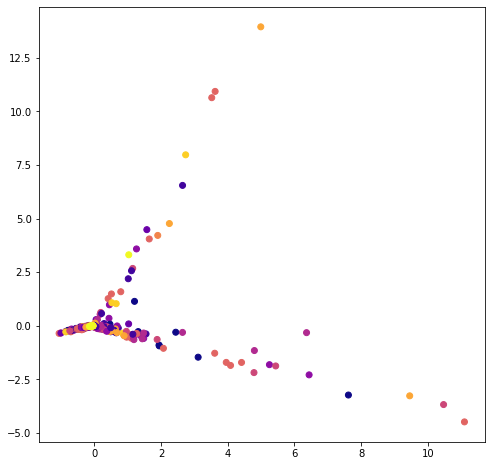

In [109]:
plt.figure(figsize = (8, 8))
plt.scatter(graph_data[0], graph_data[1], c = graph_data["category_id"], cmap = "plasma")

In [14]:
from matplotlib.font_manager import FontProperties
font = FontProperties(fname="/System/Library/Fonts/PingFang.ttc")

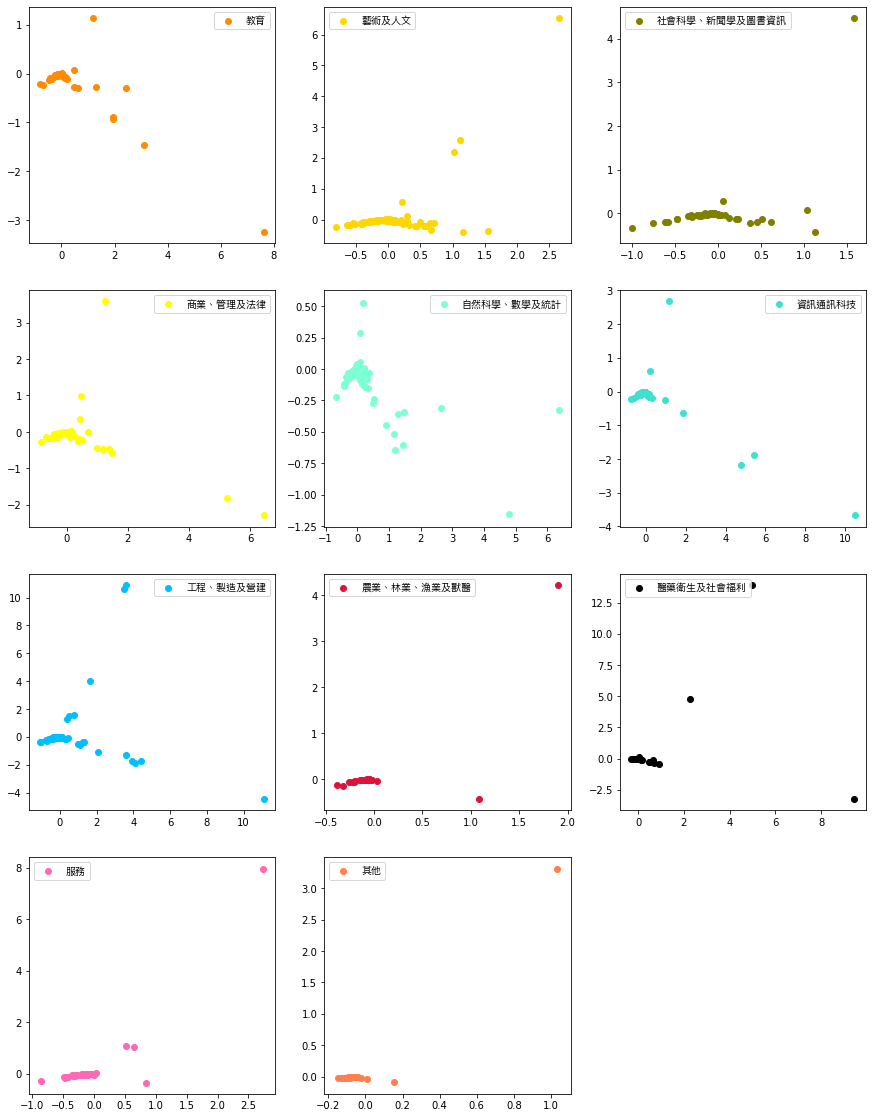

In [110]:
plt.figure(figsize=(15,20))
colors = ['darkorange', 'gold', 'olive', 'yellow', 'aquamarine', 'turquoise', 'deepskyblue', 'crimson', 'k', 'hotpink', 'coral']

for i in range(len(categories)):
    plt.subplot(4, 3, i+1)
    plt.scatter(graph_data[graph_data["category_id"] == i+1][0], graph_data[graph_data["category_id"] == i+1][1], c = colors[i])
    plt.legend(labels=(categories[i],), prop = font)

一、三類的科系的申請者相比二類似乎不太集中。

## Q2.2
Visualize academic departments using multiple dimensional scaling. Consider both the metric and non-metric settings. Discuss the result.

In [23]:
from sklearn.manifold import MDS

embedding = MDS(n_components = 2)
X_transformed = embedding.fit_transform(df_matrix)
X_transformed.shape

(1931, 2)

In [24]:
dpt_id = pd.DataFrame(df_matrix.index.T, columns = ["department_id"])
cat_id = pd.merge(uname, dpt_id, on = "department_id")[["category_id", "category_name"]]
q2_data = pd.concat([pd.DataFrame(X_transformed), cat_id], axis = 1)
q2_data = q2_data.replace('99', 11)
q2_data["category_id"] = q2_data["category_id"].astype(int)
q2_data

0         1  category_id category_name
0     -5.470377 -2.007172            1            教育
1     10.414394  4.049565            2         藝術及人文
2     -2.198360  7.323039            2         藝術及人文
3     -3.633320 -3.523105            2         藝術及人文
4      1.006955  2.636642            2         藝術及人文
...         ...       ...          ...           ...
1926   1.719170 -6.859321           11            其他
1927  -0.493958 -8.049675           11            其他
1928  -7.583115  3.884126           11            其他
1929  -6.238631  2.044990           11            其他
1930   0.151412  0.352354           11            其他

[1931 rows x 4 columns]

In [34]:
import seaborn as sns
sns.set(font = font.get_name())

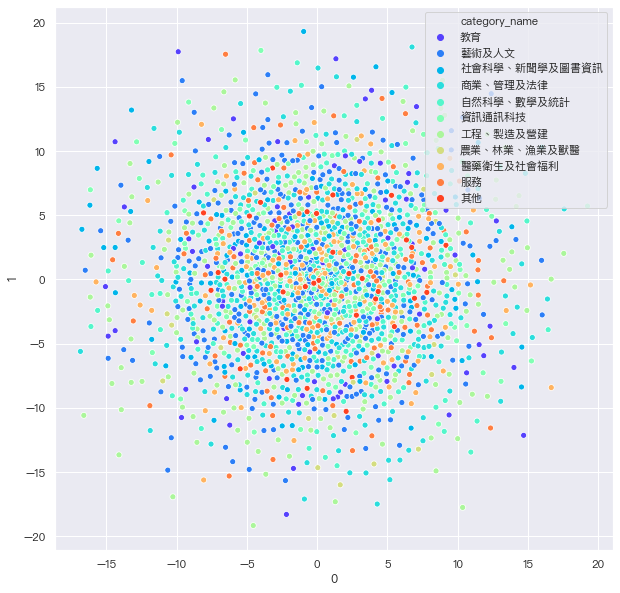

In [276]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 0, y = 1, data = q2_data, hue = "category_name", hue_order = categories, palette = "rainbow")

In [114]:
nembedding = MDS(n_components = 2, metric = False)
nX_transformed = nembedding.fit_transform(df_matrix)
nX_transformed.shape

(1931, 2)

In [115]:
q22_data = pd.concat([pd.DataFrame(nX_transformed), cat_id], axis = 1)
q22_data = q22_data.replace('99', 11)
q22_data["category_id"] = q22_data["category_id"].astype(int)
q22_data

0         1  category_id category_name
0    -0.157616 -0.344568            1            教育
1    -0.269549  0.326823            2         藝術及人文
2    -0.173734  0.412628            2         藝術及人文
3    -0.288071  0.366340            2         藝術及人文
4     0.310892 -0.253523            2         藝術及人文
...        ...       ...          ...           ...
1926  0.247437  0.166236           11            其他
1927  0.093756 -0.046557           11            其他
1928  0.178941 -0.547602           11            其他
1929  0.477637 -0.277089           11            其他
1930  0.176051  0.013822           11            其他

[1931 rows x 4 columns]

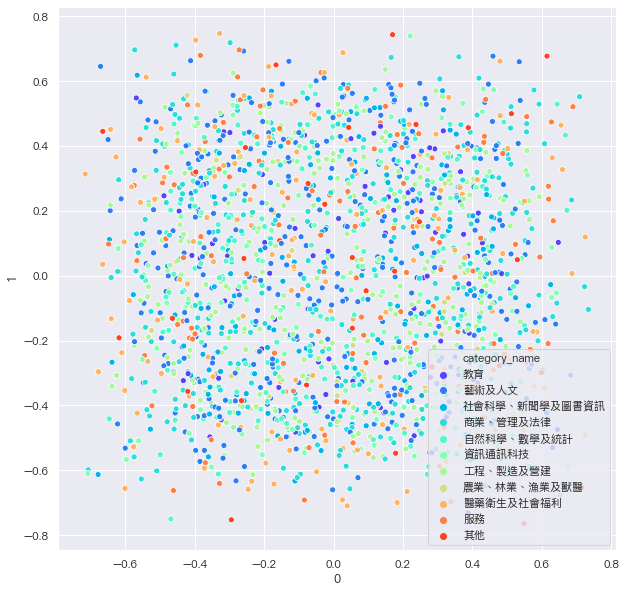

In [278]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 0, y = 1, data = q22_data, hue = "category_name", hue_order = categories, palette = "rainbow")

對於科系的選擇上，似乎散佈的很均勻。使用metric mds可以發現中間某些科系較為聚集。   
除此之外，non-metric mds計算速度較快。

## Q2.3: 
Visualize academic departments using Locally Linear Embedding.   
Consider three variations:   
(1) Use 20 neighbors to construct the weight matrix;   
(2) Use 40 neighbors to construct the weight matrix;   
(3) Perform PCA transformation first, and use the first 100 principal components as the input to LLE (with 20 neighbors). Discuss the result.

In [18]:
from sklearn.manifold import LocallyLinearEmbedding

(1) Neighbors = 20

In [74]:
lle = LocallyLinearEmbedding(n_neighbors = 20, n_components=2)
x_trans = lle.fit_transform(df_matrix)
x_trans.shape

(1931, 2)

In [117]:
q3_data = pd.concat([pd.DataFrame(x_trans), cat_id], axis = 1)
q3_data = q3_data.replace('99', 11)
q3_data["category_id"] = q3_data["category_id"].astype(int)
q3_data

0         1  category_id category_name
0     0.000894 -0.000883            1            教育
1     0.000912 -0.001266            2         藝術及人文
2     0.000899 -0.000894            2         藝術及人文
3     0.000903 -0.000825            2         藝術及人文
4     0.000905 -0.000767            2         藝術及人文
...        ...       ...          ...           ...
1926  0.001022 -0.002749           11            其他
1927  0.000899 -0.000905           11            其他
1928  0.000886 -0.000859           11            其他
1929  0.000979 -0.000882           11            其他
1930  0.001060 -0.003066           11            其他

[1931 rows x 4 columns]

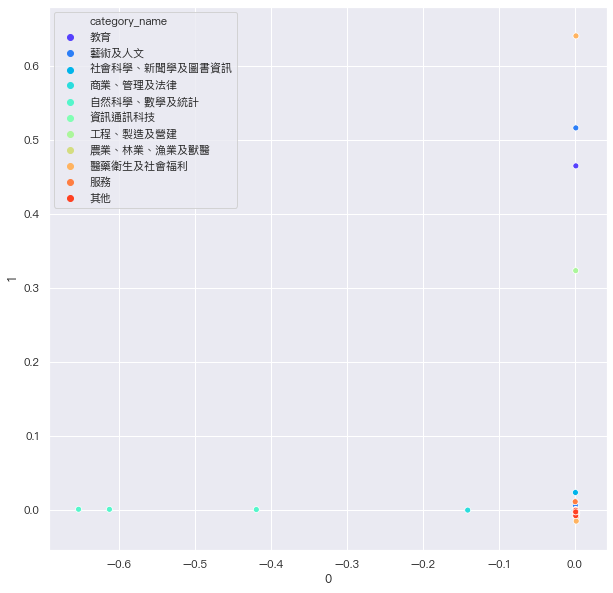

In [280]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 0, y = 1, data = q3_data, hue = "category_name", hue_order = categories, palette = "rainbow")

(2) Neighbors = 40

In [19]:
lle = LocallyLinearEmbedding(n_neighbors = 40, n_components=2)
x_trans2 = lle.fit_transform(df_matrix)
x_trans2.shape

(1931, 2)

In [26]:
categories = np.array(q31_data.groupby("category_name").mean().sort_values("category_id").index)
categories

array(['教育', '藝術及人文', '社會科學、新聞學及圖書資訊', '商業、管理及法律', '自然科學、數學及統計', '資訊通訊科技',
       '工程、製造及營建', '農業、林業、漁業及獸醫', '醫藥衛生及社會福利', '服務', '其他'], dtype=object)

In [25]:
q31_data = pd.concat([pd.DataFrame(x_trans2), cat_id], axis = 1)
q31_data = q31_data.replace('99', 11)
q31_data["category_id"] = q31_data["category_id"].astype(int)
q31_data

0         1  category_id category_name
0     0.022757 -0.001011            1            教育
1     0.022757 -0.000973            2         藝術及人文
2     0.022757 -0.001019            2         藝術及人文
3     0.022757 -0.001022            2         藝術及人文
4     0.022757 -0.001011            2         藝術及人文
...        ...       ...          ...           ...
1926  0.022757 -0.001027           11            其他
1927  0.022757 -0.001015           11            其他
1928  0.022757 -0.001030           11            其他
1929  0.022757 -0.001017           11            其他
1930  0.022757 -0.001066           11            其他

[1931 rows x 4 columns]

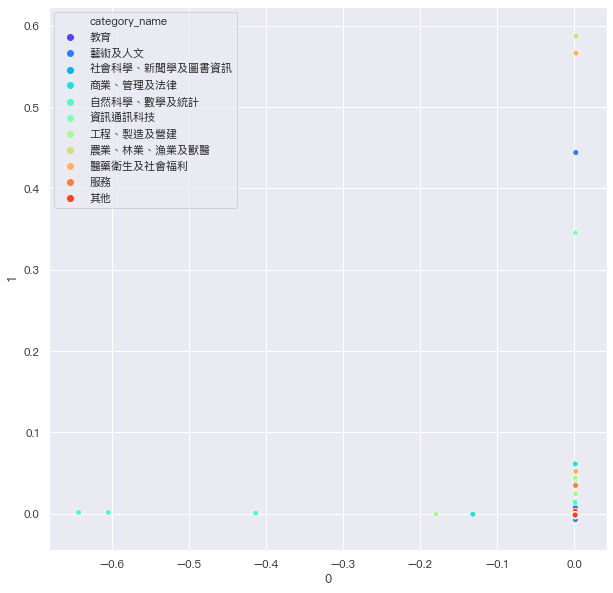

In [282]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 0, y = 1, data = q31_data, hue = "category_name", hue_order = categories, palette = "rainbow")

(3) Use PCA first

In [30]:
pca = PCA(n_components=100)
q32_raw = pca.fit_transform(df_matrix)

In [31]:
lle = LocallyLinearEmbedding(n_neighbors = 20, n_components=2)
x_trans3 = lle.fit_transform(q32_raw)
x_trans3.shape

(1931, 2)

In [32]:
q32_data = pd.concat([pd.DataFrame(x_trans3), cat_id], axis = 1)
q32_data = q32_data.replace('99', 11)
q32_data["category_id"] = q32_data["category_id"].astype(int)
q32_data

0         1  category_id category_name
0    -0.001302 -0.007828            1            教育
1    -0.008174 -0.016713            2         藝術及人文
2    -0.002223 -0.009301            2         藝術及人文
3    -0.000206 -0.005728            2         藝術及人文
4    -0.000152 -0.005462            2         藝術及人文
...        ...       ...          ...           ...
1926 -0.004389 -0.022217           11            其他
1927 -0.001198 -0.005482           11            其他
1928  0.004391  0.026870           11            其他
1929  0.001635 -0.001821           11            其他
1930  0.001585 -0.002898           11            其他

[1931 rows x 4 columns]

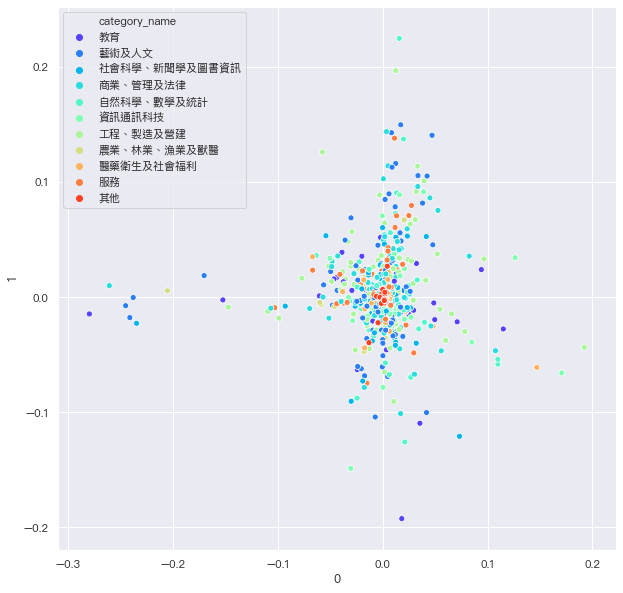

In [35]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 0, y = 1, data = q32_data, hue = "category_name", hue_order = categories, palette = "rainbow")

改變neighbors數量似乎不會改變散布的形狀，且效果不佳，但先做PCA再做LLE則有明顯提升。

## Q2.4:  
Visualize academic departments using Kernel PCA. You should at least consider the RBF and Cosine kernel. It is your responsibility to select reasonably good kernel parameters. Discuss the result.

In [138]:
from sklearn.decomposition import KernelPCA

(1) Using rbf kernel.

In [326]:
transformer = KernelPCA(n_components = 2, kernel = 'rbf')
x_t = transformer.fit_transform(df_matrix)
x_t.shape

(1931, 2)

In [327]:
x_t

array([[-3.32839494e-04, -7.79628514e-05],
       [ 1.22103932e-03, -9.88218402e-05],
       [-3.53846171e-04, -8.19973076e-05],
       ...,
       [-6.64526553e-04, -7.63724348e-05],
       [-6.30815029e-04, -6.94246563e-05],
       [-4.84525279e-04, -2.16863734e-05]])

In [328]:
q41_data = pd.concat([pd.DataFrame(x_t), cat_id], axis = 1)
q41_data = q41_data.replace('99', 11)
q41_data["category_id"] = q41_data["category_id"].astype(int)
q41_data

0         1  category_id category_name
0    -0.000333 -0.000078            1            教育
1     0.001221 -0.000099            2         藝術及人文
2    -0.000354 -0.000082            2         藝術及人文
3    -0.000102 -0.000128            2         藝術及人文
4    -0.000241 -0.000013            2         藝術及人文
...        ...       ...          ...           ...
1926 -0.000587 -0.000052           11            其他
1927 -0.000628 -0.000065           11            其他
1928 -0.000665 -0.000076           11            其他
1929 -0.000631 -0.000069           11            其他
1930 -0.000485 -0.000022           11            其他

[1931 rows x 4 columns]

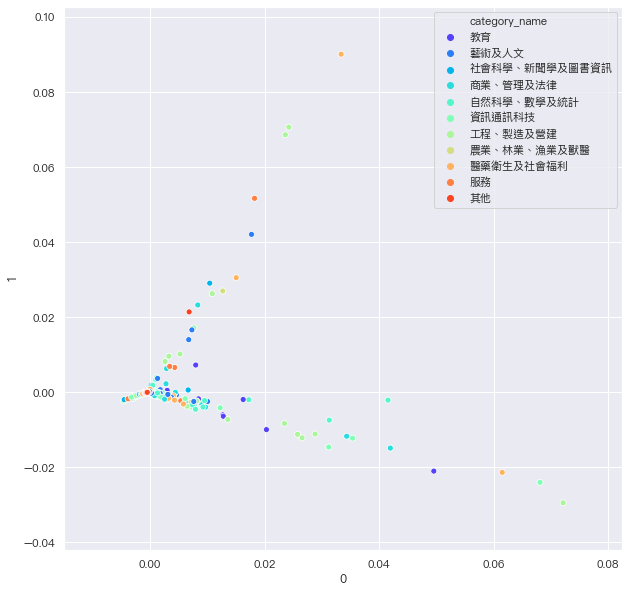

In [329]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 0, y = 1, data = q41_data, hue = "category_name", hue_order = categories, palette = "rainbow")

(2) Using cosine kernel.

In [340]:
transformer2 = KernelPCA(n_components = 2, kernel = 'cosine')
x_t2 = transformer2.fit_transform(df_matrix)
x_t2.shape

(1931, 2)

In [342]:
x_t2

array([[ 0.01204415, -0.03410031],
       [ 0.05238872, -0.06570276],
       [ 0.01335236, -0.03829962],
       ...,
       [-0.01358666,  0.01205469],
       [-0.01361466,  0.01213267],
       [-0.00659723,  0.00371555]])

In [341]:
q42_data = pd.concat([pd.DataFrame(x_t2), cat_id], axis = 1)
q42_data = q42_data.replace('99', 11)
q42_data["category_id"] = q42_data["category_id"].astype(int)
q42_data

0         1  category_id category_name
0     0.012044 -0.034100            1            教育
1     0.052389 -0.065703            2         藝術及人文
2     0.013352 -0.038300            2         藝術及人文
3     0.019156 -0.037522            2         藝術及人文
4     0.014206 -0.030133            2         藝術及人文
...        ...       ...          ...           ...
1926 -0.011119  0.006853           11            其他
1927 -0.012410  0.010446           11            其他
1928 -0.013587  0.012055           11            其他
1929 -0.013615  0.012133           11            其他
1930 -0.006597  0.003716           11            其他

[1931 rows x 4 columns]

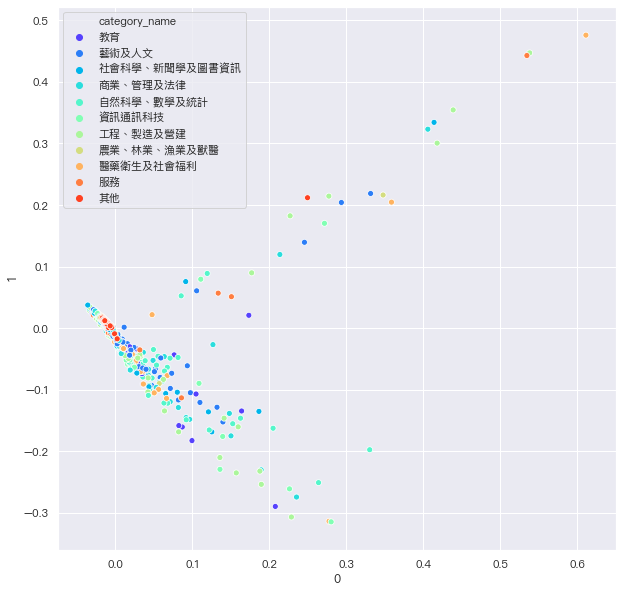

In [343]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 0, y = 1, data = q42_data, hue = "category_name", hue_order = categories, palette = "rainbow")

兩種Kernel PCA可以大致看出少許data有線性關係，其他則無，代表某些特定科系申請者較集中，其他則無。

## Q2.5: 
Visualize academic departments using t-SNE. You should consider at least the Euclidian, Cosine, and Jaccard metric. Set numpy random seed so that your results can be repeated. Discuss the result.

In [316]:
from sklearn.manifold import TSNE
np.random.seed(1524)

(1) Euclidean metric

In [317]:
transformer = TSNE(n_components = 2, metric = 'euclidean')
X_embedded = transformer.fit_transform(df_matrix)
X_embedded.shape

(1931, 2)

In [318]:
X_embedded

array([[ 34.10079  , -34.753845 ],
       [-26.764994 ,   2.4935672],
       [-20.348188 , -24.254469 ],
       ...,
       [ 26.487934 , -46.770786 ],
       [  2.3871517,  42.64649  ],
       [ -1.7788078,  -0.0795176]], dtype=float32)

In [319]:
q51_data = pd.concat([pd.DataFrame(X_embedded), cat_id], axis = 1)
q51_data = q51_data.replace('99', 11)
q51_data["category_id"] = q51_data["category_id"].astype(int)
q51_data

0          1  category_id category_name
0     34.100788 -34.753845            1            教育
1    -26.764994   2.493567            2         藝術及人文
2    -20.348188 -24.254469            2         藝術及人文
3     18.895708  20.984970            2         藝術及人文
4     -9.812926  33.890083            2         藝術及人文
...         ...        ...          ...           ...
1926 -48.479553 -23.197605           11            其他
1927  21.005369  31.758142           11            其他
1928  26.487934 -46.770786           11            其他
1929   2.387152  42.646488           11            其他
1930  -1.778808  -0.079518           11            其他

[1931 rows x 4 columns]

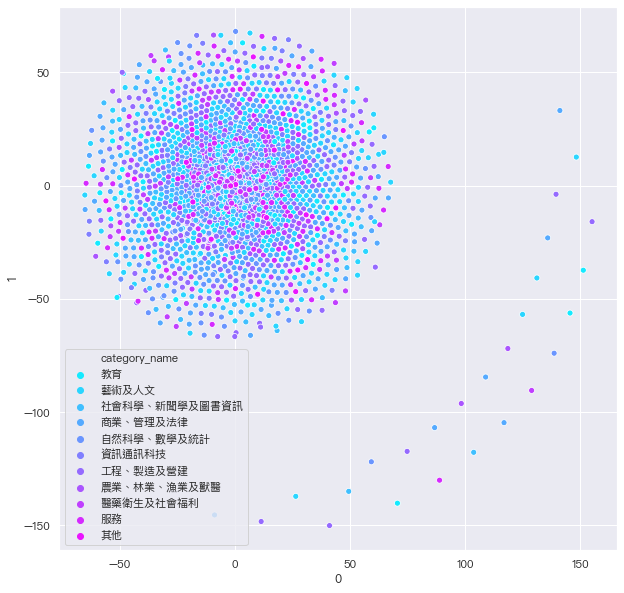

In [320]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 0, y = 1, data = q51_data, hue = "category_name", hue_order = categories, palette = "cool")

(2) Cosine metric

In [167]:
np.random.seed(1524)
transformer = TSNE(n_components = 2, metric = 'cosine')
X_embedded2 = transformer.fit_transform(df_matrix)
X_embedded2.shape

(1931, 2)

In [168]:
X_embedded2

array([[-39.85363   , -51.474247  ],
       [-46.32148   , -55.202797  ],
       [-38.800907  , -51.044334  ],
       ...,
       [ 18.479355  ,   4.5464106 ],
       [ 31.49712   ,   5.8171544 ],
       [ -0.71595144,  -6.6507916 ]], dtype=float32)

In [169]:
q52_data = pd.concat([pd.DataFrame(X_embedded2), cat_id], axis = 1)
q52_data = q52_data.replace('99', 11)
q52_data["category_id"] = q52_data["category_id"].astype(int)
q52_data

0          1  category_id category_name
0    -39.853630 -51.474247            1            教育
1    -46.321480 -55.202797            2         藝術及人文
2    -38.800907 -51.044334            2         藝術及人文
3    -38.382751 -49.968071            2         藝術及人文
4    -37.692001 -51.718731            2         藝術及人文
...         ...        ...          ...           ...
1926   0.277971  -8.139527           11            其他
1927  -4.629387   9.180417           11            其他
1928  18.479355   4.546411           11            其他
1929  31.497120   5.817154           11            其他
1930  -0.715951  -6.650792           11            其他

[1931 rows x 4 columns]

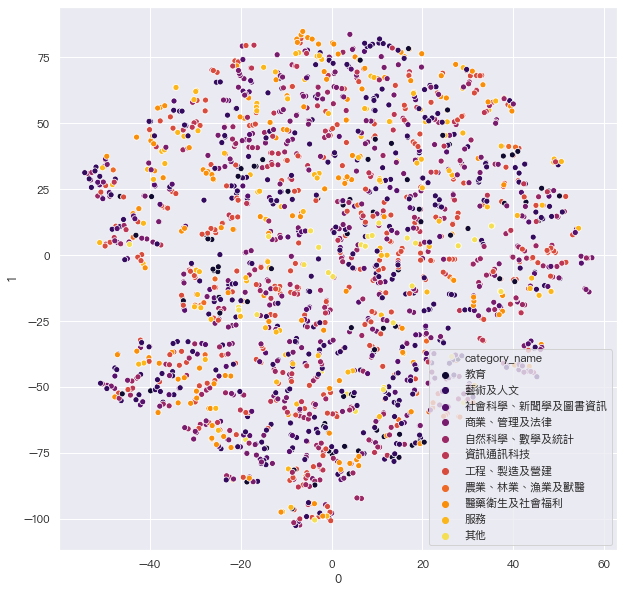

In [288]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 0, y = 1, data = q52_data, hue = "category_name", hue_order = categories, palette = "inferno")

(3) Jaccard metric

In [171]:
np.random.seed(1524)
transformer = TSNE(n_components = 2, metric = 'jaccard')
X_embedded3 = transformer.fit_transform(df_matrix)
X_embedded3.shape

(1931, 2)

In [172]:
X_embedded3

array([[ -8.390922  , -45.973774  ],
       [-13.101849  , -50.113373  ],
       [ -7.248871  , -45.908993  ],
       ...,
       [ -3.4695673 ,   0.21708733],
       [  9.021807  ,  10.932673  ],
       [ 19.14298   , -11.368228  ]], dtype=float32)

In [173]:
q53_data = pd.concat([pd.DataFrame(X_embedded3), cat_id], axis = 1)
q53_data = q53_data.replace('99', 11)
q53_data["category_id"] = q53_data["category_id"].astype(int)
q53_data

0          1  category_id category_name
0     -8.390922 -45.973774            1            教育
1    -13.101849 -50.113373            2         藝術及人文
2     -7.248871 -45.908993            2         藝術及人文
3     -6.698172 -45.218002            2         藝術及人文
4     -6.278155 -46.815071            2         藝術及人文
...         ...        ...          ...           ...
1926  21.365965 -14.440728           11            其他
1927 -23.012772   6.354989           11            其他
1928  -3.469567   0.217087           11            其他
1929   9.021807  10.932673           11            其他
1930  19.142981 -11.368228           11            其他

[1931 rows x 4 columns]

In [245]:
import seaborn as sns
sns.set(font = font.get_name())

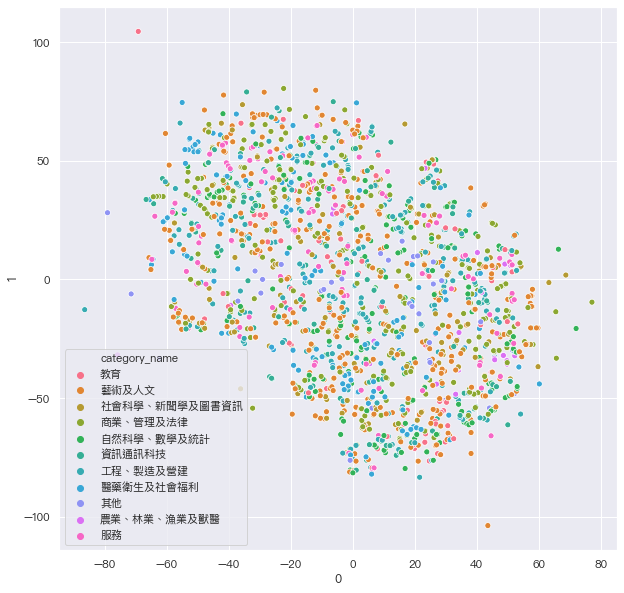

In [247]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 0, y = 1, data = q53_data, hue = "category_name")

三種計算距離的方式畫出的圖相當不同，但各類科系的分佈似乎都很分散。

# Question 3 [Refine]   
(30%) Select the most promising visualization method in the previous question and refine the result. You should color points by department category. Label each data point with its name so that we can quickly identify a data point on the picture. Moreover, you should try to reduce the problem caused by overlapping points and labels. Output an image that is large enough so that a user can easily identify a department and its neighbors. Jupyter Lab has limitations on the largest picture size. To overcome this problem, output the picture to a separate file and submit the file for grading. Your score depends on how useful, readable, and visually pleasing of your visualization results.

在這裡我選擇分布最為分散的T-SNE，並使用cosine metric來畫圖。

In [305]:
df_q3 = pd.concat([q52_data, pd.merge(uname, dpt_id, on = "department_id")[["school_name_abbr", "department_name_abbr"]]], axis = 1)
df_q3

0          1  category_id category_name school_name_abbr  \
0    -39.853630 -51.474247            1            教育               政大   
1    -46.321480 -55.202797            2         藝術及人文               政大   
2    -38.800907 -51.044334            2         藝術及人文               政大   
3    -38.382751 -49.968071            2         藝術及人文               政大   
4    -37.692001 -51.718731            2         藝術及人文               政大   
...         ...        ...          ...           ...              ...   
1926   0.277971  -8.139527           11            其他               陽明   
1927  -4.629387   9.180417           11            其他               長榮   
1928  18.479355   4.546411           11            其他               長榮   
1929  31.497120   5.817154           11            其他               臺北   
1930  -0.715951  -6.650792           11            其他               康寧   

     department_name_abbr  
0                      教育  
1                      歷史  
2                     民族學  
3                      哲學  
4                    英國語文  
...                   ...  
1926              不分系(璞B)  
1927                東南亞觀光  
1928              東南亞產業商貿  
1929                  飛鳶組  
1930               企管(臺南)  

[1931 rows x 6 columns]

In [306]:
df_q3 = pd.concat([df_q3, pd.DataFrame(df_q3["school_name_abbr"] + df_q3["department_name_abbr"], columns = ["dept_name"])], axis = 1)
df_q3 = df_q3.drop(["school_name_abbr", "department_name_abbr"], axis = 1)
df_q3

0          1  category_id category_name  dept_name
0    -39.853630 -51.474247            1            教育       政大教育
1    -46.321480 -55.202797            2         藝術及人文       政大歷史
2    -38.800907 -51.044334            2         藝術及人文      政大民族學
3    -38.382751 -49.968071            2         藝術及人文       政大哲學
4    -37.692001 -51.718731            2         藝術及人文     政大英國語文
...         ...        ...          ...           ...        ...
1926   0.277971  -8.139527           11            其他  陽明不分系(璞B)
1927  -4.629387   9.180417           11            其他    長榮東南亞觀光
1928  18.479355   4.546411           11            其他  長榮東南亞產業商貿
1929  31.497120   5.817154           11            其他      臺北飛鳶組
1930  -0.715951  -6.650792           11            其他   康寧企管(臺南)

[1931 rows x 5 columns]

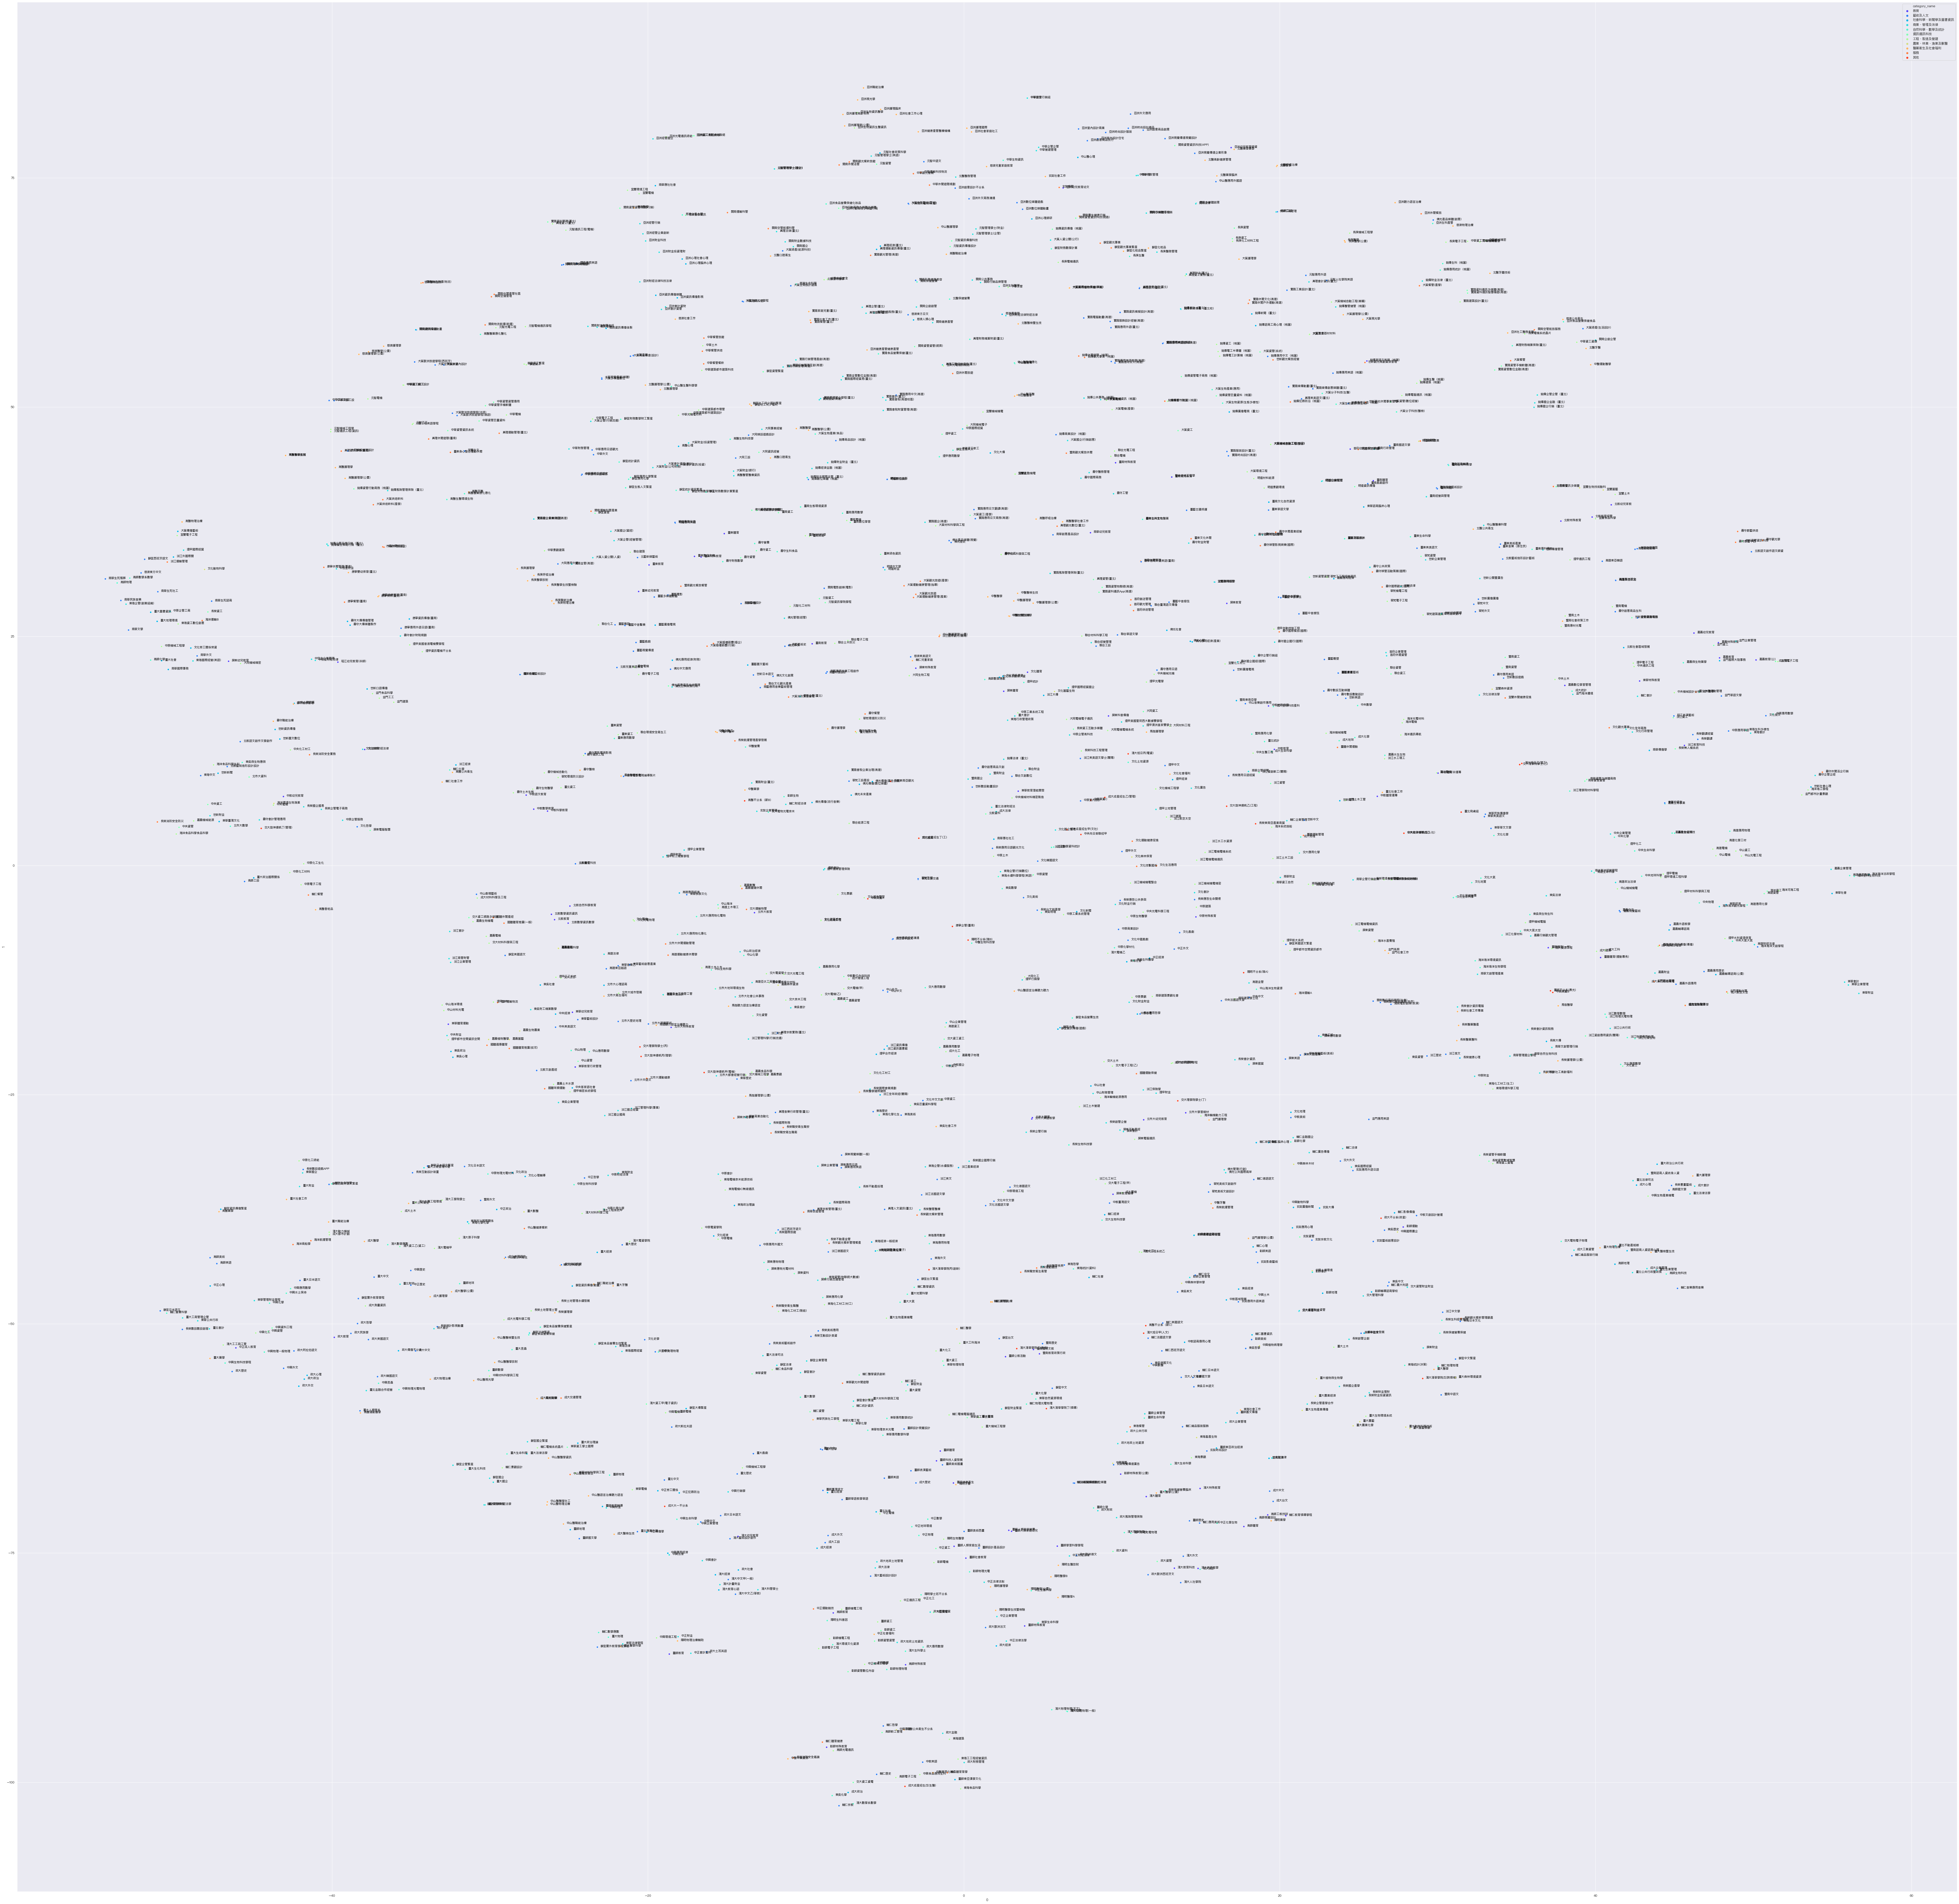

In [346]:
plt.figure(figsize=(120,120))
p1 = sns.scatterplot(x = 0, y = 1, data = df_q3, hue = "category_name", hue_order = categories, palette = "rainbow")

for line in range(0,df_q3.shape[0]):
     p1.text(df_q3[0][line]+0.2, df_q3[1][line], df_q3["dept_name"][line], horizontalalignment='left', size='small', color='black', weight='light')
        
plt.savefig("output.png")